# MTA Challenges

### Challenge 1

In [1]:
import pandas as pd

download_dates = pd.date_range(start='2018-09-01',end='2018-09-30',freq='W-SAT')
download_dates = download_dates.astype(str)

base_url = ("http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt")

list_of_url = [base_url.format(date[2:4]+date[5:7]+date[8:]) for date in download_dates]

mta = pd.concat((pd.read_csv(url) for url in list_of_url))

In [ ]:
mta.head()

### Challenge 2

In [4]:
mta['datetime'] = mta.DATE + ' ' + mta.TIME

mta.datetime = pd.to_datetime(mta.datetime)

mta = mta.drop(['DATE','TIME'],axis=1)

In [5]:
mta.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
datetime                                                                datetime64[ns]
dtype: object

### Challenge 3

In [6]:
mta['turnstile'] = mta['C/A']+mta.UNIT+mta.SCP+mta.STATION

C/A  UNIT       SCP STATION LINENAME DIVISION     DESC  ENTRIES  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  REGULAR  6736067   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  REGULAR  6736087   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  REGULAR  6736105   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  REGULAR  6736180   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  REGULAR  6736349   

   EXITS                                                                 \
0                                            2283184                      
1                                            2283188                      
2                                            2283229                      
3                                            2283314                      
4                                            2283384                      

             datetime              turnstile  
0 2018-08-25 00:00:00  A002R05102-00-0059 ST  
1 2018-08-25 04:00:00  A002R05102-00-0059 ST  
2 2018-08-25 08:00:00  A002R05102-00-0059 ST  
3 2018-08-25 12:00:00  A002R05102-00-0059 ST  
4 2018-08-25 16:00:00  A002R05102-00-0059 ST

In [8]:
mta = mta.sort_values(['STATION','SCP','datetime']).reset_index(drop=True)
recover = mta[mta.DESC!='REGULAR']
mta = mta[mta.DESC=='REGULAR']

mta['riders_in'] = mta.ENTRIES.diff()

mta['match'] = mta.SCP.eq(mta.SCP.shift())

import numpy as np
mta.loc[mta.match==False,'riders_in'] = np.nan
mta.head()

C/A  UNIT       SCP STATION LINENAME DIVISION     DESC   ENTRIES  \
0  H007  R248  00-00-00    1 AV        L      BMT  REGULAR  13868622   
1  H007  R248  00-00-00    1 AV        L      BMT  REGULAR  13868725   
2  H007  R248  00-00-00    1 AV        L      BMT  REGULAR  13868800   
3  H007  R248  00-00-00    1 AV        L      BMT  REGULAR  13869196   
4  H007  R248  00-00-00    1 AV        L      BMT  REGULAR  13869796   

   EXITS                                                                 \
0                                           15561330                      
1                                           15561554                      
2                                           15561822                      
3                                           15562502                      
4                                           15563471                      

             datetime             turnstile  riders_in  match  
0 2018-08-25 00:00:00  H007R24800-00-001 AV        NaN  False  
1 2018-08-25 04:00:00  H007R24800-00-001 AV      103.0   True  
2 2018-08-25 08:00:00  H007R24800-00-001 AV       75.0   True  
3 2018-08-25 12:00:00  H007R24800-00-001 AV      396.0   True  
4 2018-08-25 16:00:00  H007R24800-00-001 AV      600.0   True

In [9]:
mta.drop('match',inplace=True,axis=1)

In [10]:
mta['date'] = mta.datetime.dt.date
mta['hour'] = mta.datetime.dt.hour

In [20]:
by_turnstile = pd.DataFrame(mta.groupby(['turnstile','date']).riders_in.sum().reset_index())
turnstile.head()

turnstile              date      
A002R05102-00-0059 ST  2018-08-25     495.0
                       2018-08-26     505.0
                       2018-08-27    1190.0
                       2018-08-28    1373.0
                       2018-08-29    1258.0
Name: riders_in, dtype: float64

### Challenge 4

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 1600.0)

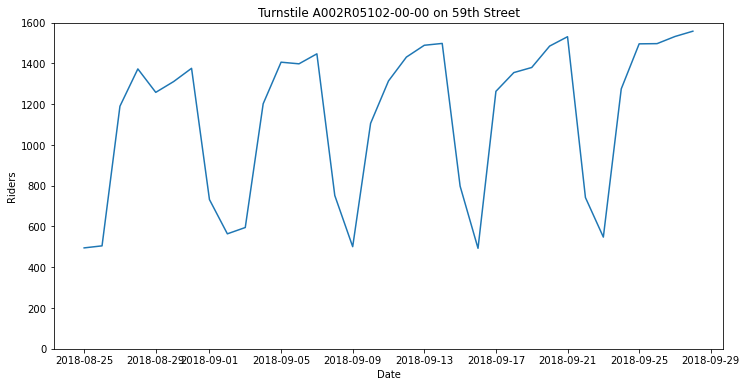

In [23]:
turn_one = by_turnstile[by_turnstile.turnstile=='A002R05102-00-0059 ST']
plt.figure(figsize=(12,6))
plt.plot(turn_one.date,turn_one.riders_in)
plt.xlabel('Date')
plt.ylabel('Riders')
plt.title('Turnstile A002R05102-00-00 on 59th Street')
plt.ylim(0,1600)

In [38]:
station_sum = mta.groupby('STATION')['riders_in'].sum().sort_values(ascending=False)
station_sum.head(20)

STATION
TIMES SQ-42 ST     3.629833e+09
14 ST              3.349973e+09
23 ST              2.837385e+09
125 ST             2.069205e+09
CANAL ST           1.993894e+09
34 ST-PENN STA     1.929725e+09
GUN HILL RD        1.313360e+09
FULTON ST          1.295843e+09
FORDHAM RD         1.133652e+09
CHAMBERS ST        1.103603e+09
BOWLING GREEN      7.810675e+08
145 ST             7.421362e+08
DEKALB AV          4.993963e+08
GRD CNTRL-42 ST    4.429240e+08
GRAND ST           2.545339e+08
CHURCH AV          1.848200e+08
77 ST              1.468264e+08
96 ST              4.383749e+07
149/GRAND CONC     3.304960e+07
DYCKMAN ST         2.132729e+07
Name: riders_in, dtype: float64

In [40]:
mta[mta.riders_in>10000]

C/A  UNIT       SCP         STATION LINENAME DIVISION     DESC  \
2102     R252  R180  00-00-00          103 ST        6      IRT  REGULAR   
2105     R252  R180  00-00-00          103 ST        6      IRT  REGULAR   
2108     R252  R180  00-00-00          103 ST        6      IRT  REGULAR   
2110     R252  R180  00-00-00          103 ST        6      IRT  REGULAR   
2113     R252  R180  00-00-00          103 ST        6      IRT  REGULAR   
...       ...   ...       ...             ...      ...      ...      ...   
979212  N329A  R201  01-06-01  WOODHAVEN BLVD       MR      IND  REGULAR   
979215  N329A  R201  01-06-01  WOODHAVEN BLVD       MR      IND  REGULAR   
979217  N329A  R201  01-06-01  WOODHAVEN BLVD       MR      IND  REGULAR   
979219  N329A  R201  01-06-01  WOODHAVEN BLVD       MR      IND  REGULAR   
979221  N329A  R201  01-06-01  WOODHAVEN BLVD       MR      IND  REGULAR   

         ENTRIES  \
2102    36167383   
2105    36167403   
2108    36167625   
2110    36167989   
2113    36168482   
...          ...   
979212   2093465   
979215   2094354   
979217   2094794   
979219   2095300   
979221   2095710   

        EXITS                                                                 \
2102                                            505304611                      
2105                                            505304665                      
2108                                            505304940                      
2110                                            505305296                      
2113                                            505305684                      
...                                                   ...                      
979212                                             200095                      
979215                                             200103                      
979217                                             200132                      
979219                                             200176                      
979221                                             200247                      

                  datetime                        turnstile   riders_in  \
2102   2018-08-25 01:00:00           R252R18000-00-00103 ST  34843078.0   
2105   2018-08-25 05:00:00           R252R18000-00-00103 ST  34843082.0   
2108   2018-08-25 09:00:00           R252R18000-00-00103 ST  34843296.0   
2110   2018-08-25 13:00:00           R252R18000-00-00103 ST  22548122.0   
2113   2018-08-25 17:00:00           R252R18000-00-00103 ST  34844153.0   
...                    ...                              ...         ...   
979212 2018-09-28 01:00:00  N329AR20101-06-01WOODHAVEN BLVD    895516.0   
979215 2018-09-28 09:00:00  N329AR20101-06-01WOODHAVEN BLVD    896155.0   
979217 2018-09-28 13:00:00  N329AR20101-06-01WOODHAVEN BLVD    896366.0   
979219 2018-09-28 17:00:00  N329AR20101-06-01WOODHAVEN BLVD    896769.0   
979221 2018-09-28 21:00:00  N329AR20101-06-01WOODHAVEN BLVD    897088.0   

              date  hour  
2102    2018-08-25     1  
2105    2018-08-25     5  
2108    2018-08-25     9  
2110    2018-08-25    13  
2113    2018-08-25    17  
...            ...   ...  
979212  2018-09-28     1  
979215  2018-09-28     9  
979217  2018-09-28    13  
979219  2018-09-28    17  
979221  2018-09-28    21  

[95731 rows x 14 columns]